### Spotify en R

In [ ]:
Benzitouni Fethi/Bertin Alexandre/Hoang Van HaoNguyen/Hai Vy

In [79]:
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(lasso2)
library(glmnet)

path <- ""
spotify <- read.table(paste(path, "spotify-extr.txt", sep = ""),
                    sep = "", header = TRUE)

In [80]:
print("Beginning the process")
summary(spotify)

[1] "Beginning the process"


    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
    duration           energy       instrumentalness       key           
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   Length:10000      
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   Class :character  
 Median : 206530   Median :0.4760   Median :0.000174   Mode  :character  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947                     
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100                     
 Max.   :2703227   Max.   :1.0000   Max.   :1.000000                     
    liveness 

In [81]:
# Changement du type des variables qualitatives en facteur
spotify[, "key"] <- as.factor(spotify[, "key"])
spotify[, "pop.class"] <- as.factor(spotify[, "pop.class"])

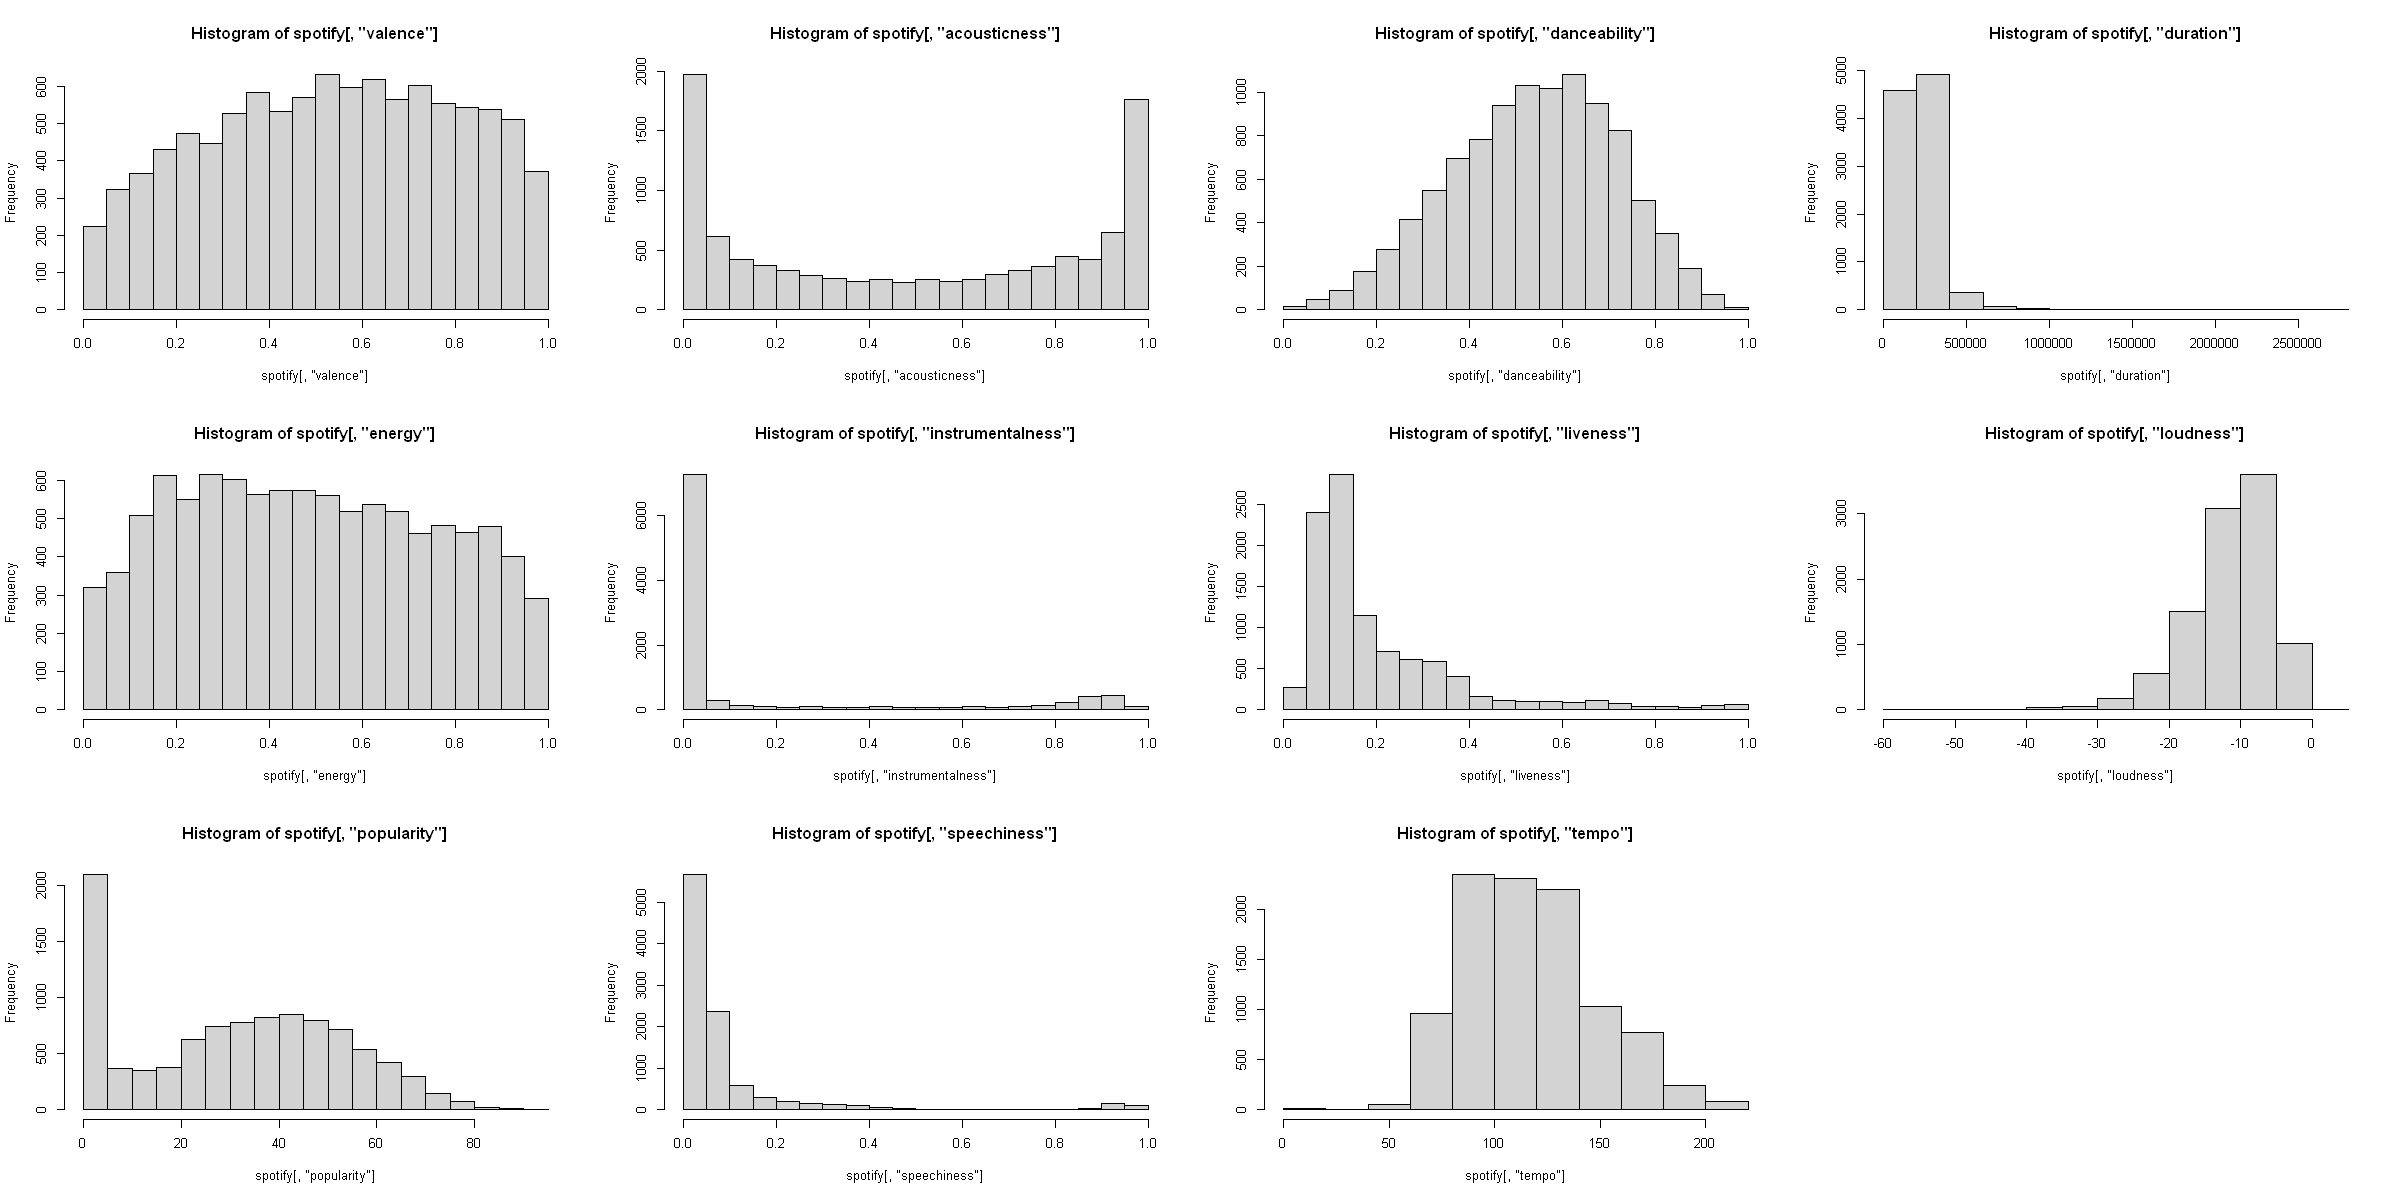

In [82]:

par(mfrow = c(3, 4))
options(repr.plot.width = 20, repr.plot.height = 10)
hist(spotify[, "valence"])
hist(spotify[, "acousticness"])
hist(spotify[, "danceability"])
hist(spotify[, "duration"])
hist(spotify[, "energy"])
hist(spotify[, "instrumentalness"])
hist(spotify[, "liveness"])
hist(spotify[, "loudness"])
hist(spotify[, "popularity"])
hist(spotify[, "speechiness"])
hist(spotify[, "tempo"])

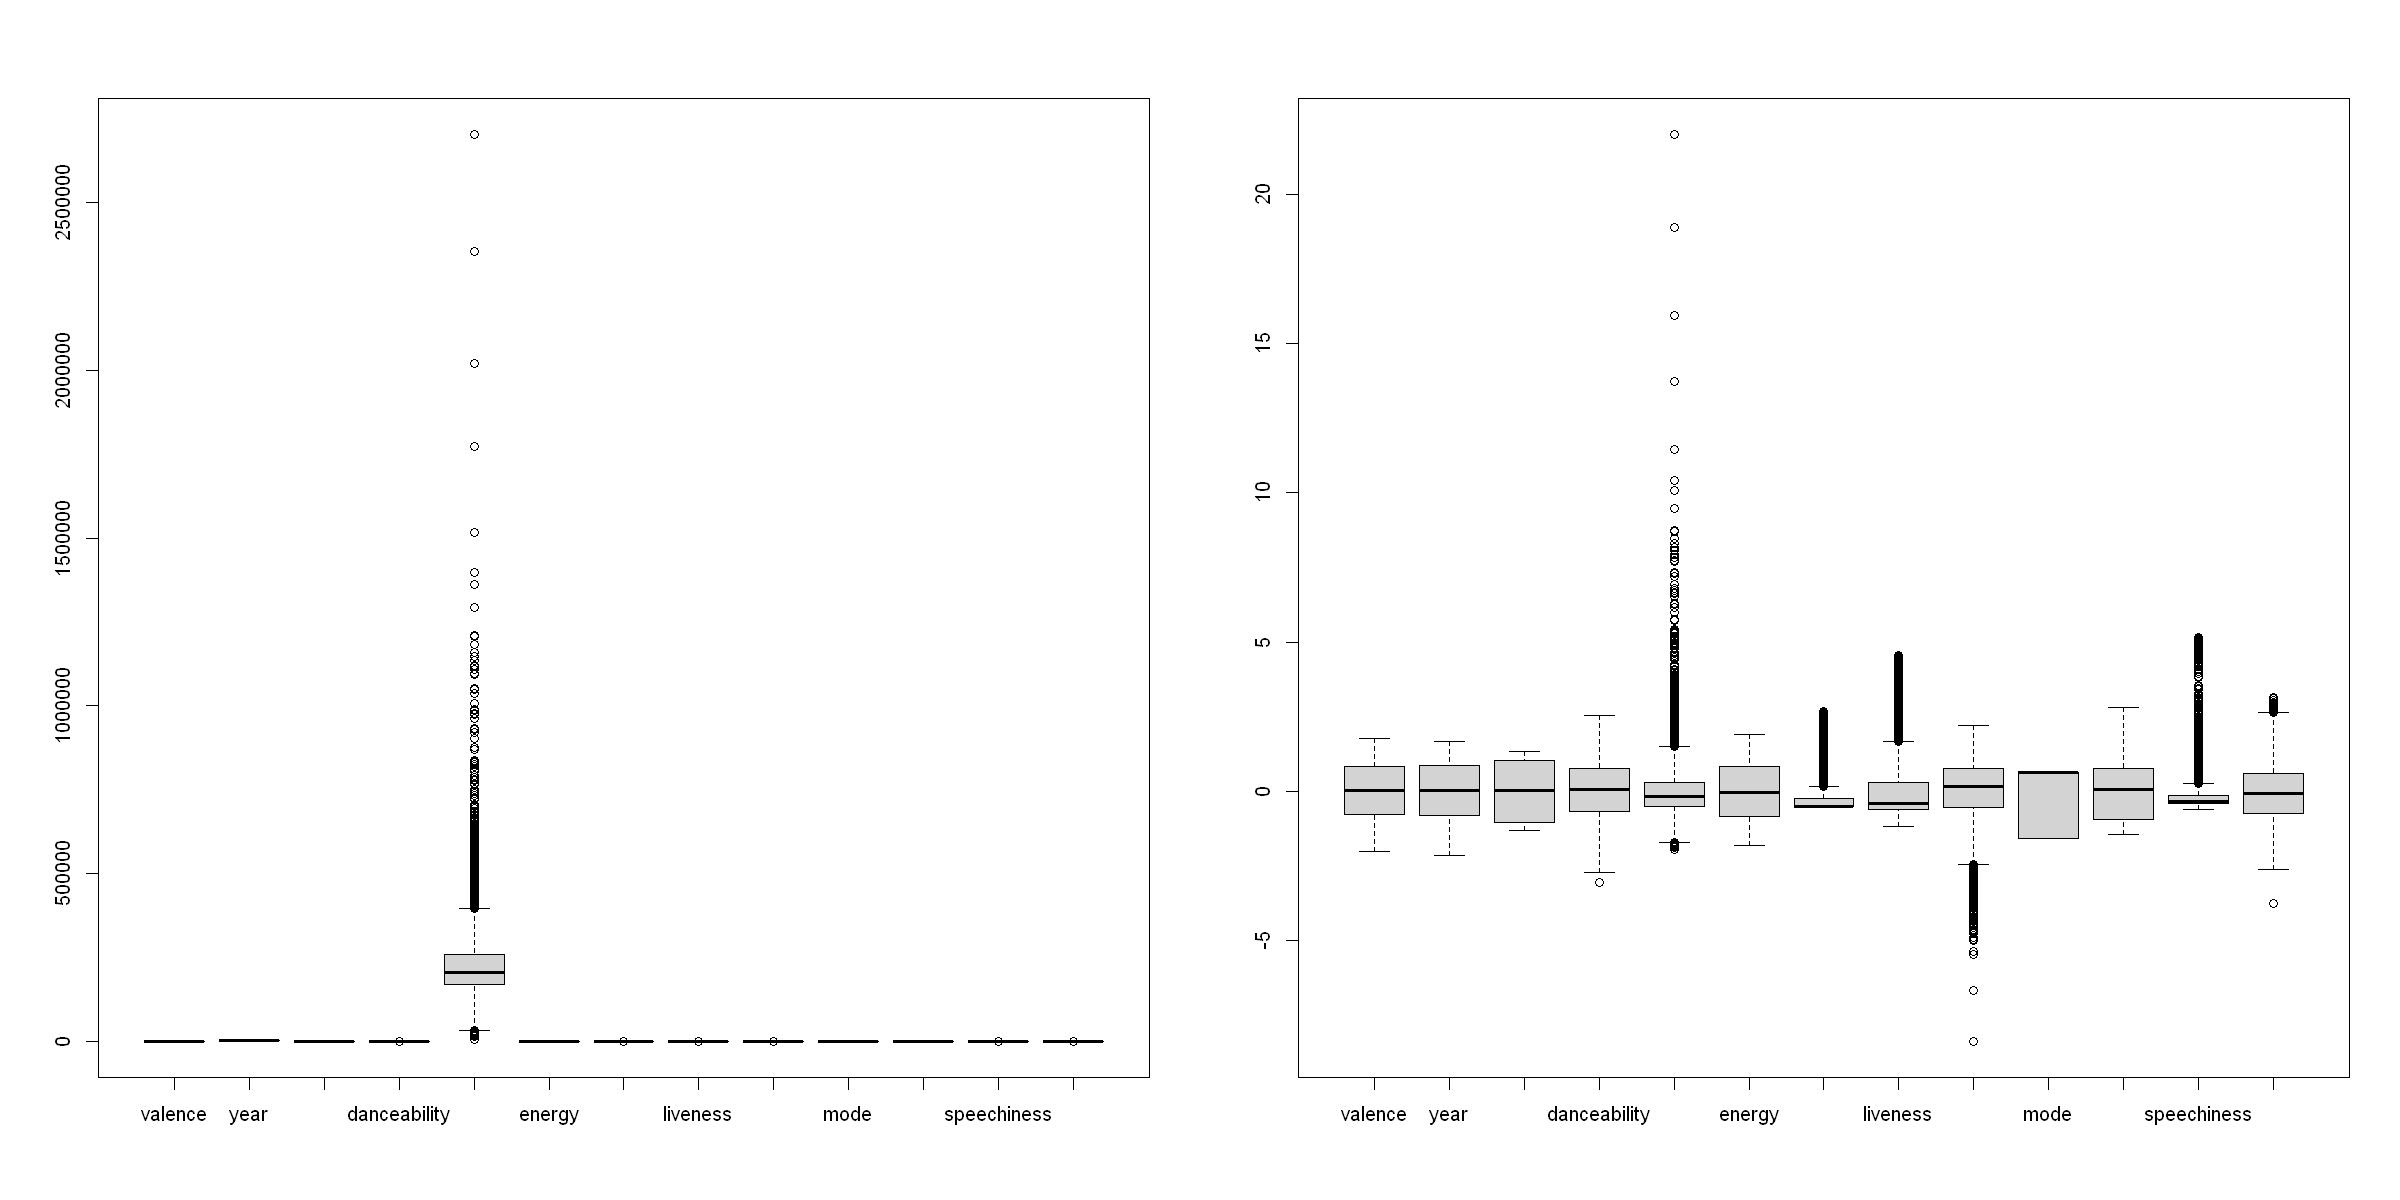

In [84]:

par(mfrow = c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 10)
boxplot(spotify[,-c(8,15)])
boxplot(scale(spotify[,-c(8,15)]))


In [87]:
library(corrplot)
par(mfrow = c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 10)
M <- cor(spotify[,-c(8,11,15)])
print(M)

                      valence        year acousticness danceability    duration
valence           1.000000000 -0.02334014 -0.181083216  0.555040995 -0.19151748
year             -0.023340141  1.00000000 -0.616552675  0.179616958  0.11181762
acousticness     -0.181083216 -0.61655268  1.000000000 -0.263299286 -0.11125000
danceability      0.555040995  0.17961696 -0.263299286  1.000000000 -0.12667120
duration         -0.191517482  0.11181762 -0.111250001 -0.126671204  1.00000000
energy            0.342156953  0.53851363 -0.748025603  0.203769513  0.07108875
instrumentalness -0.198931888 -0.28054416  0.329291362 -0.275780441  0.07208135
liveness         -0.004653718 -0.05749267 -0.005874111 -0.110652061  0.01751017
loudness          0.310309883  0.49360886 -0.558335078  0.268976052  0.02539365
popularity        0.020718251  0.85871330 -0.575480760  0.189824583  0.09437628
speechiness       0.036828105 -0.17474763 -0.050378690  0.232991828 -0.09303860
tempo             0.173929326  0.1440606

Analyse en composantes principales

                       Dim.1      Dim.2        Dim.3        Dim.4       Dim.5
acousticness     -0.82733674  0.0681274 -0.027348536 -0.149050808 -0.10373043
danceability      0.41856121  0.5950850 -0.321735627  0.248976906  0.06821582
duration          0.04294834 -0.5073615  0.240733691  0.662631280  0.40823612
energy            0.88962023 -0.2060405  0.080656633  0.009934079 -0.08498690
instrumentalness -0.56153539 -0.3490137  0.009897939  0.009958794  0.13051314
liveness          0.06818153  0.0689742  0.892270226 -0.097089266 -0.31774140
loudness          0.85912174 -0.1505263 -0.063406696 -0.018800853 -0.21345572
speechiness       0.01032067  0.7319430  0.378494421  0.121582231  0.40996836
tempo             0.36524176 -0.1822004  0.069094428 -0.650841337  0.59633285
                        Dim.6       Dim.7
acousticness     -0.200590140  0.26483026
danceability      0.153190757  0.51914981
duration         -0.224614568  0.15483704
energy            0.238878103 -0.10127250
instrument

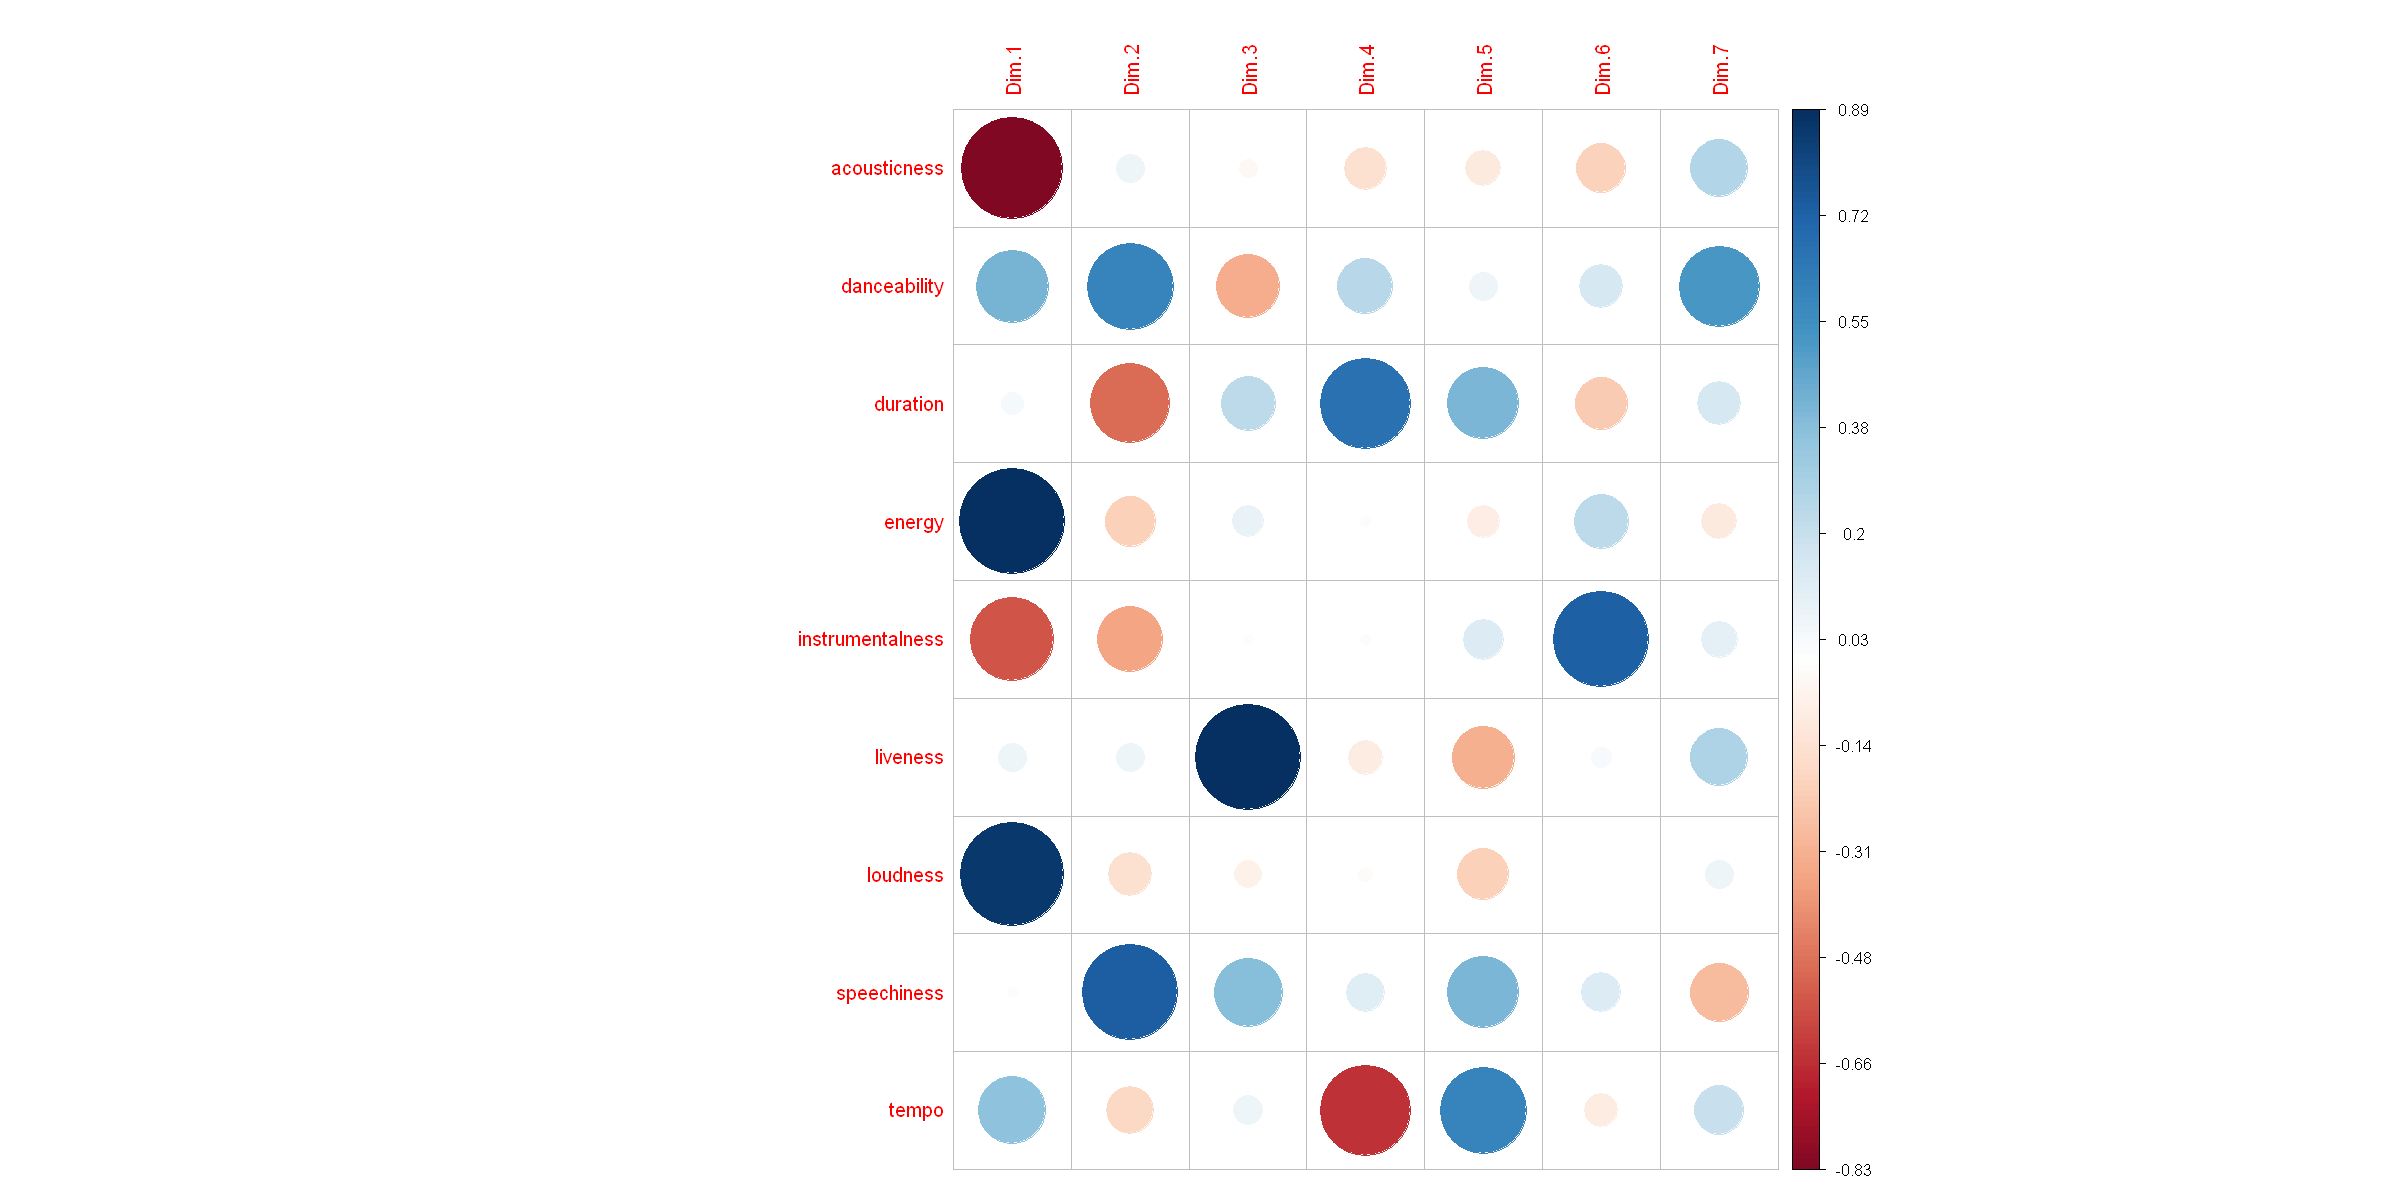

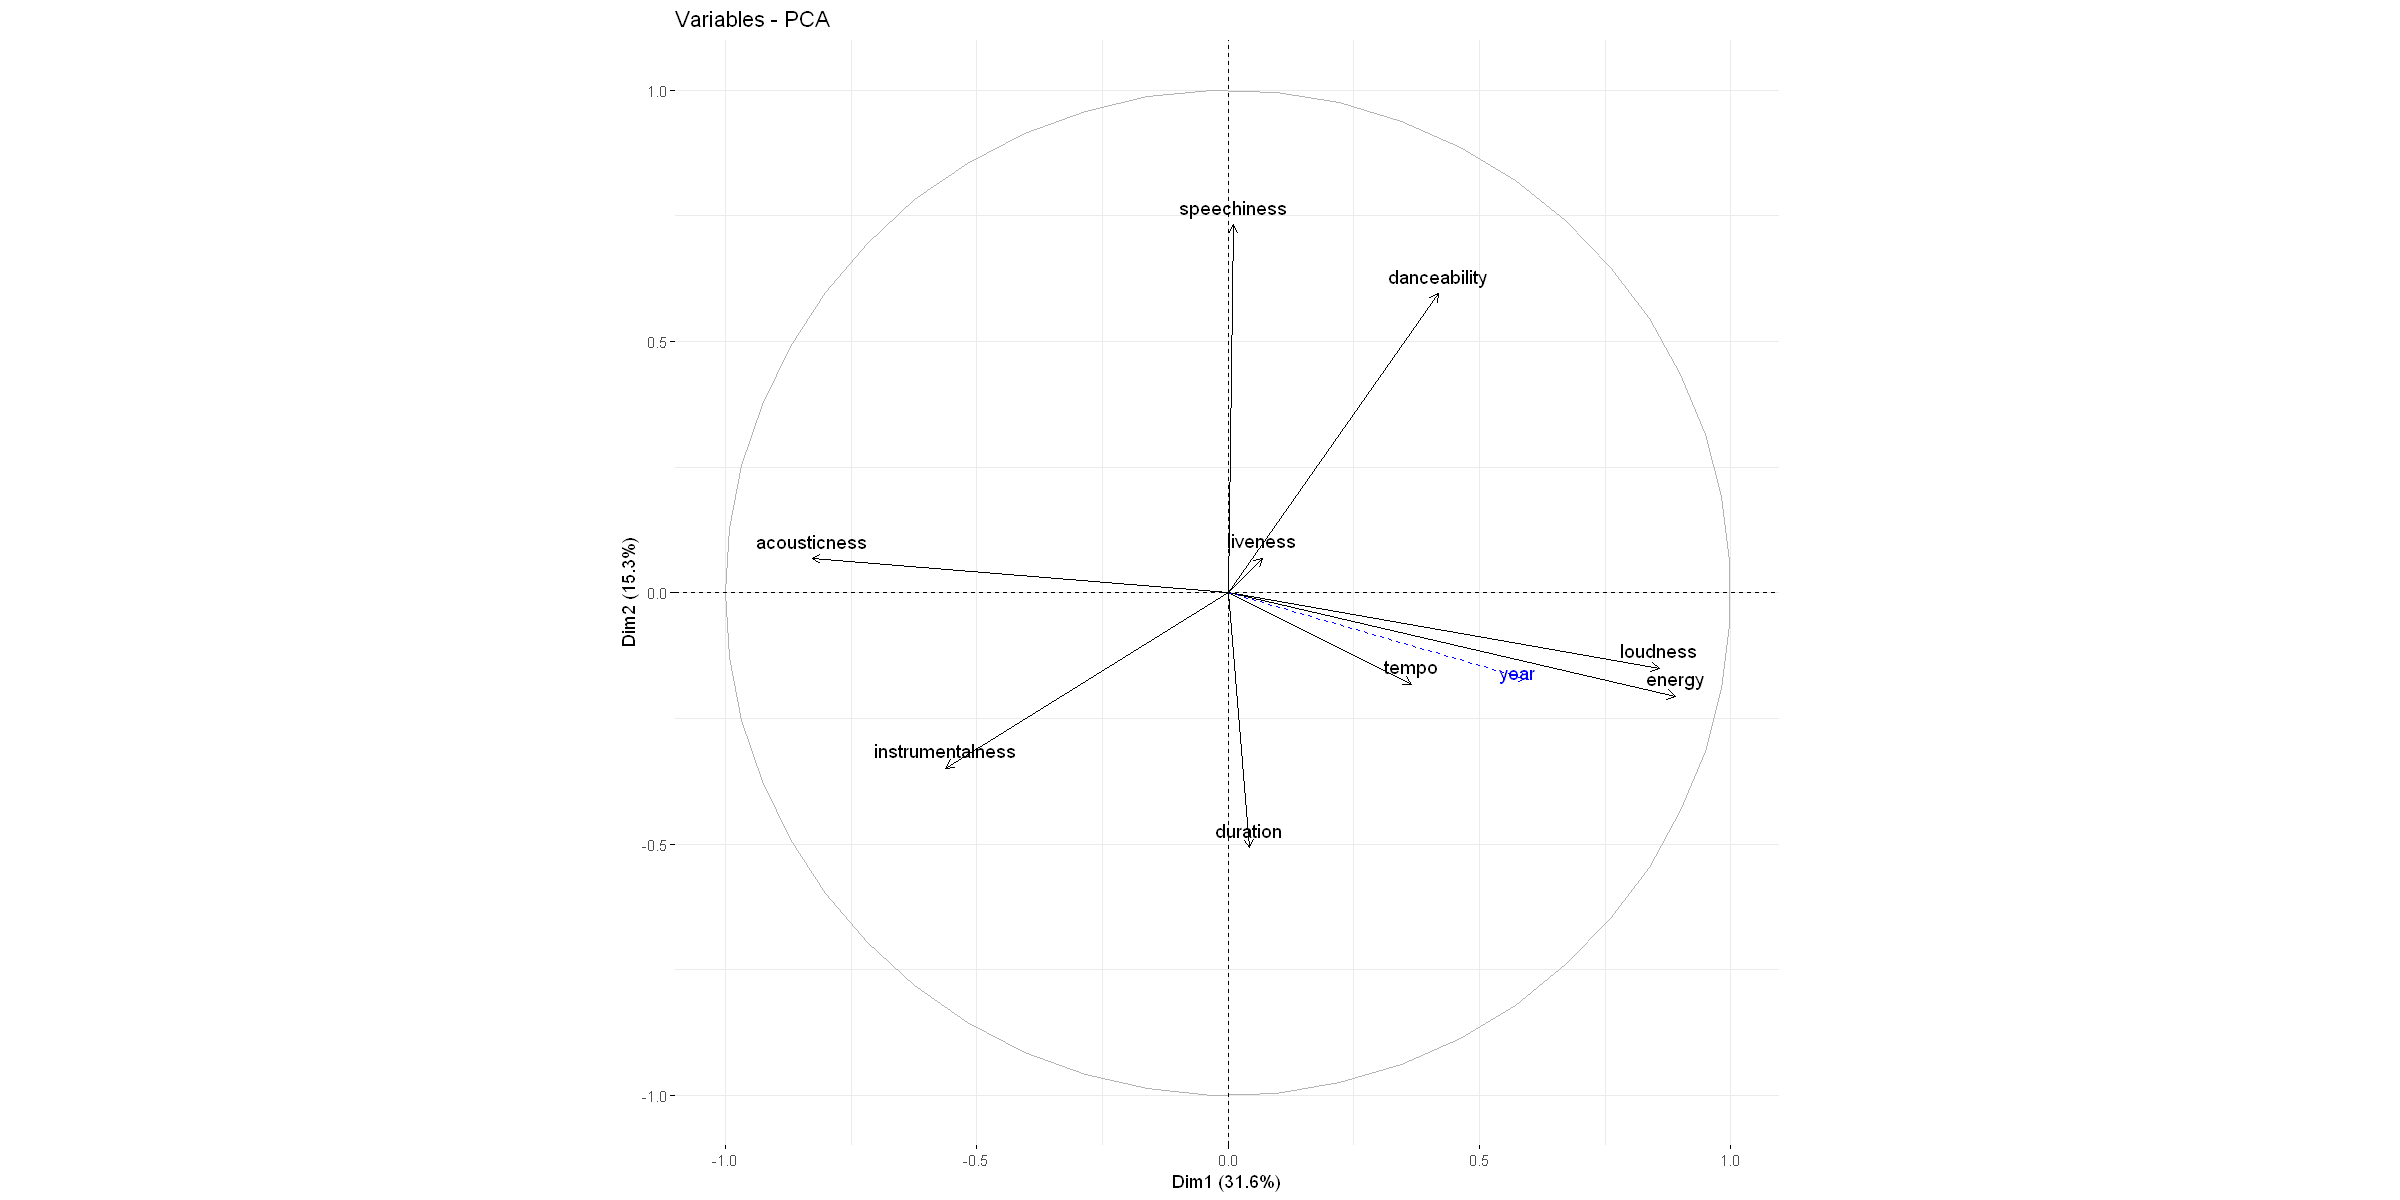

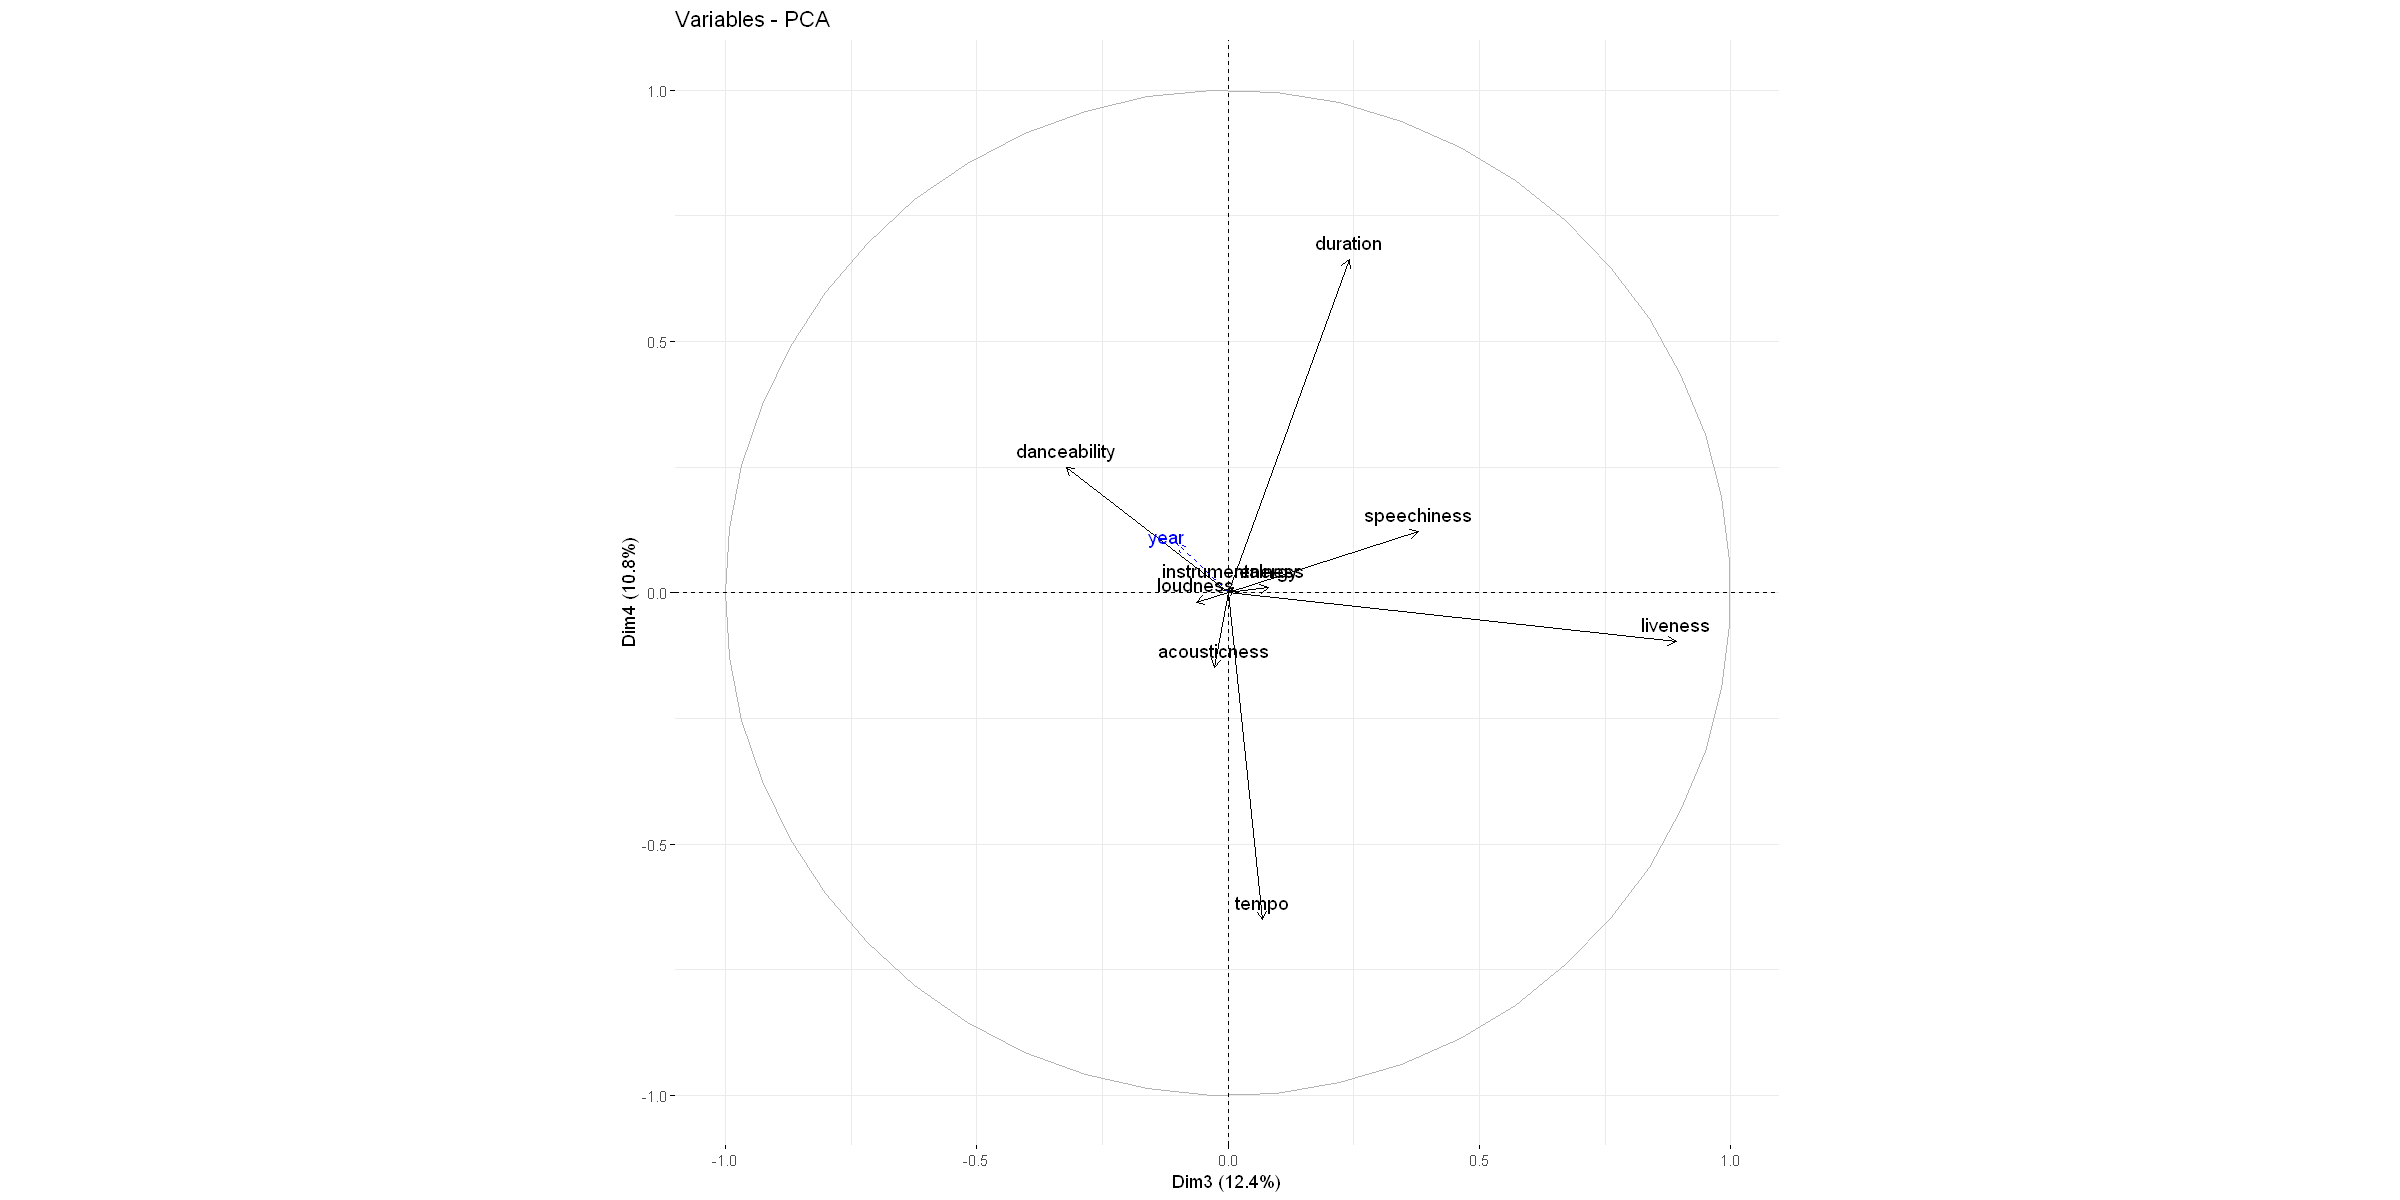

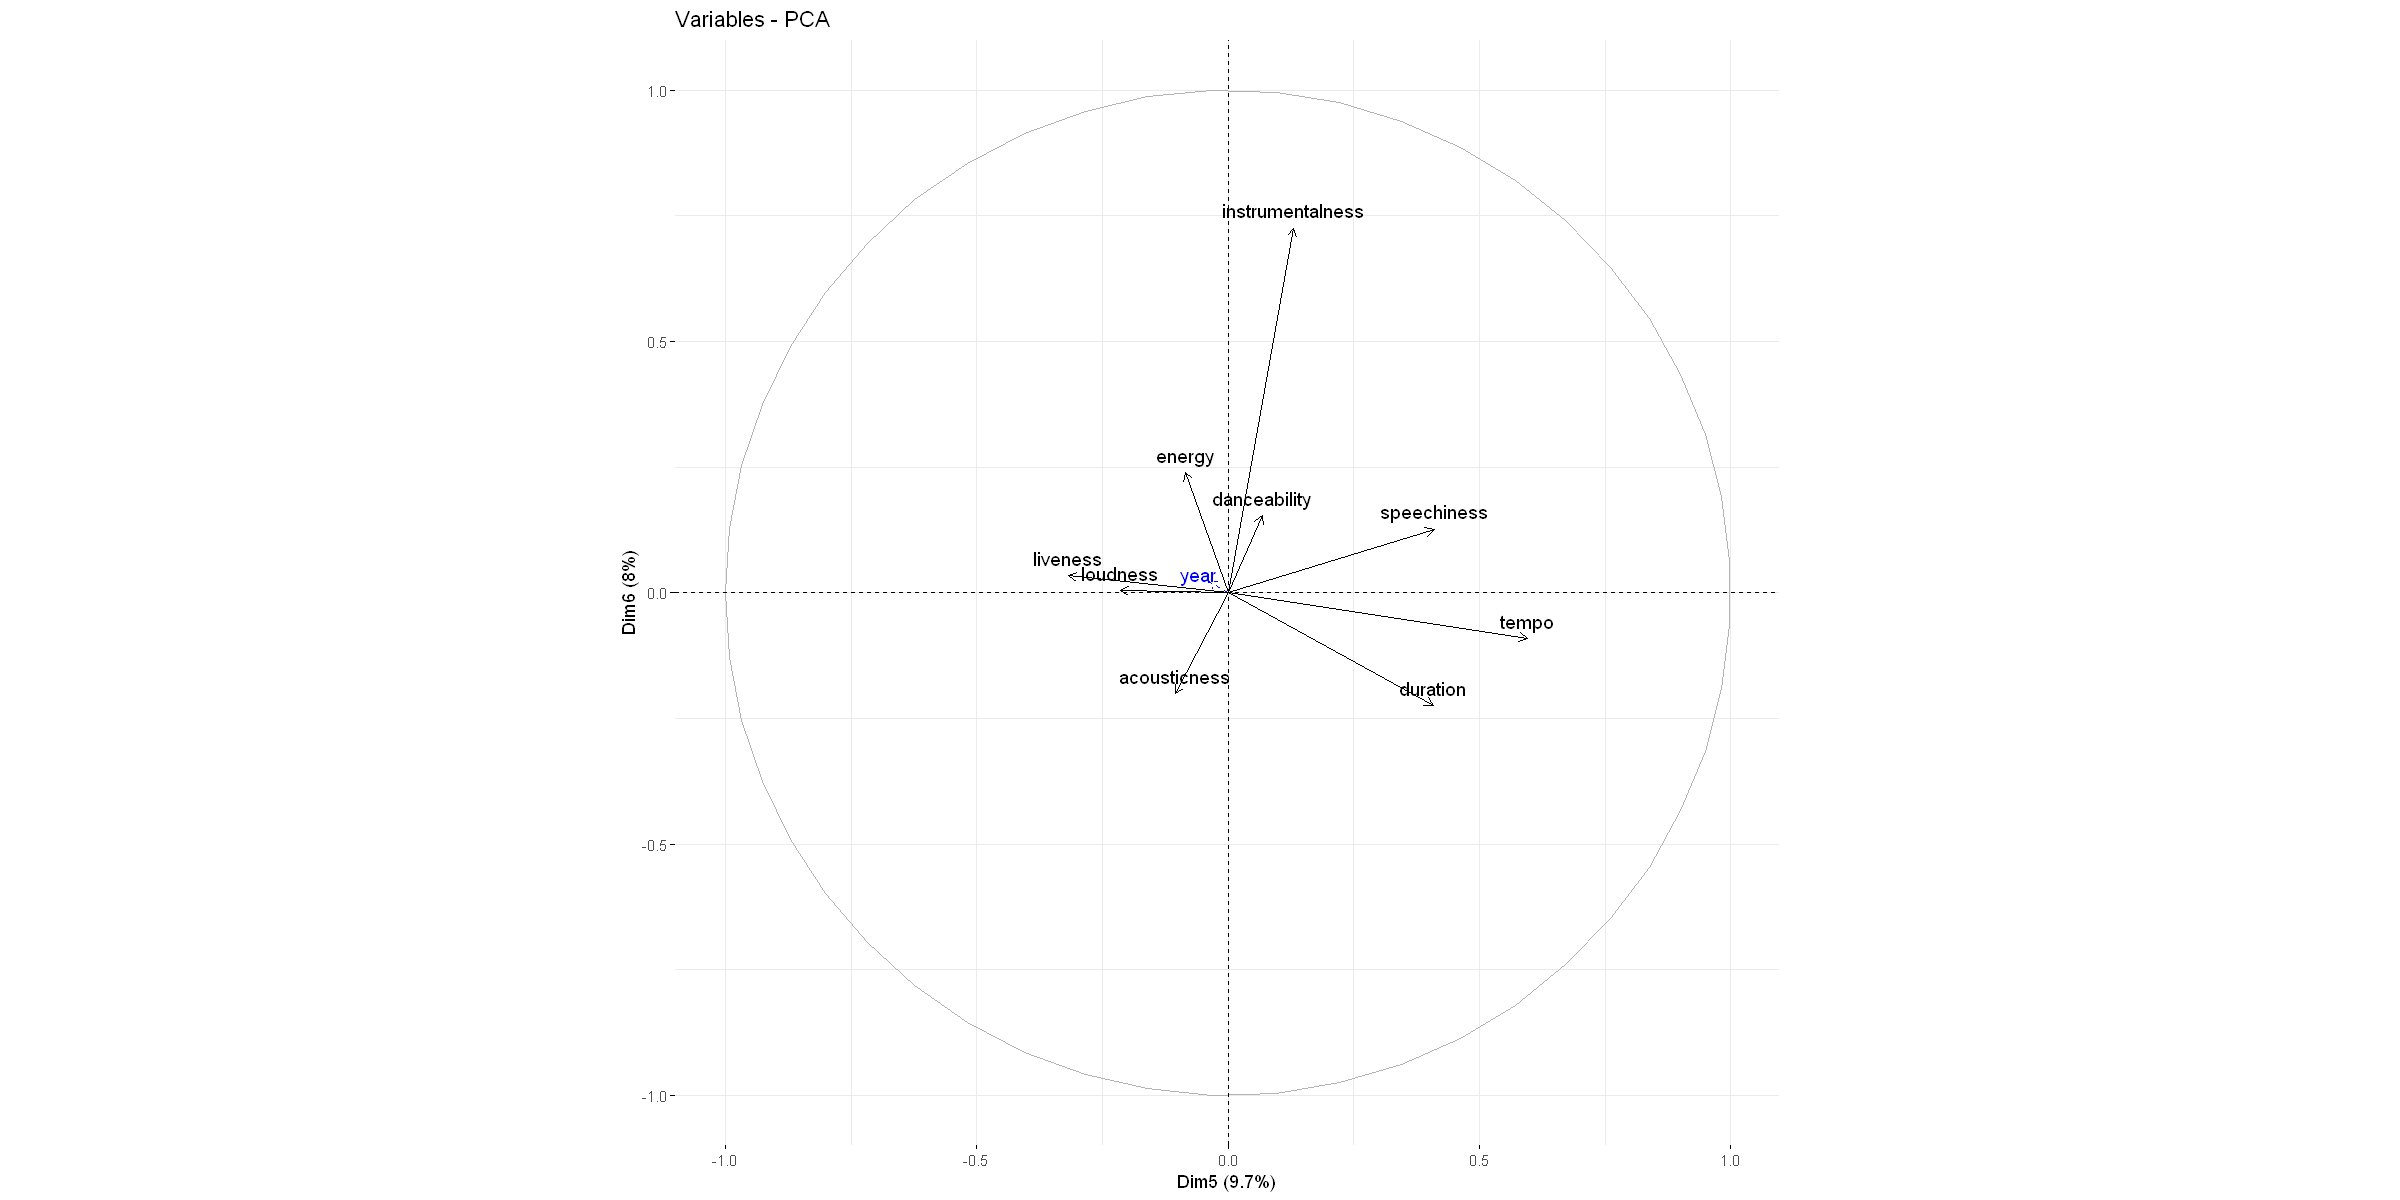

In [88]:
library(FactoMineR)
 #ACP réduite
 #Décroissance des valeurs propres
acp <- PCA(spotify[,-c(8,11,12,15)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
#par(mfrow = c(1, 2))
#barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia",ylim = c(0, 35))
#boxplot(acp$ind$coord, main = "Coordinates of individuals")
#print(sum(acp$eig[, 2][1:6]))
var <- get_pca_var(acp)
print(var$coord)
corrplot(var$coord, is.corr=FALSE) 
par(mfrow = c(1, 3))
options(repr.plot.width = 20, repr.plot.height = 10)
fviz_pca_var(acp, col.var = "black")
fviz_pca_var(acp, col.var = "black",axes = c(3,4))
fviz_pca_var(acp, col.var = "black",axes = c(5,6))

### Préparation des données

In [90]:
#Construction des échantillons
N=2000
xxx=111  # modifer cette valeur
set.seed(xxx)
# modifier 111
npop=nrow(spotify)
# tirage de 200 indices sans remise
testi=sample(1:npop,N)
#Liste des indices restant qui n’ont pas été tirés
appri=setdiff(1:npop,testi)
# Extraction échantillons d’apprentissage
spotify_apprentissage=spotify[appri,]
# Extraction échantillons de test
spotify_test=spotify[testi,]

Construction des échantillons pour la régression : prévision de la popularity

In [91]:
# construction de l'échantillon d'apprentissage
datappr <- spotify[appri, -15] 
# construction de l'échantillon test
datestr <- spotify[testi, -15] 
summary(datappr) 

    valence            year       acousticness        danceability   
 Min.   :0.0000   Min.   :1921   Min.   :0.0000011   Min.   :0.0000  
 1st Qu.:0.3230   1st Qu.:1956   1st Qu.:0.0930000   1st Qu.:0.4170  
 Median :0.5410   Median :1978   Median :0.5010000   Median :0.5490  
 Mean   :0.5315   Mean   :1977   Mean   :0.4955507   Mean   :0.5397  
 3rd Qu.:0.7480   3rd Qu.:1999   3rd Qu.:0.8900000   3rd Qu.:0.6690  
 Max.   :0.9880   Max.   :2020   Max.   :0.9960000   Max.   :0.9880  
                                                                     
    duration           energy         instrumentalness         key      
 Min.   :  14960   Min.   :0.000099   Min.   :0.0000000   C      :1000  
 1st Qu.: 169027   1st Qu.:0.263000   1st Qu.:0.0000000   G      : 949  
 Median : 206854   Median :0.475500   Median :0.0001655   D      : 900  
 Mean   : 227433   Mean   :0.487024   Mean   :0.1642986   A      : 838  
 3rd Qu.: 259740   3rd Qu.:0.706000   3rd Qu.:0.0808750   F      : 769  
 M

Construction des échantillons pour la régression : prévision de les notes $(A ,B ,C ,D)$

In [92]:
# construction de l'échantillon d'apprentissage
datappq <- spotify[appri, -12] 
# construction de l'échantillon test
datestq <- spotify[testi, -12] 
summary(datappq) 

    valence            year       acousticness        danceability   
 Min.   :0.0000   Min.   :1921   Min.   :0.0000011   Min.   :0.0000  
 1st Qu.:0.3230   1st Qu.:1956   1st Qu.:0.0930000   1st Qu.:0.4170  
 Median :0.5410   Median :1978   Median :0.5010000   Median :0.5490  
 Mean   :0.5315   Mean   :1977   Mean   :0.4955507   Mean   :0.5397  
 3rd Qu.:0.7480   3rd Qu.:1999   3rd Qu.:0.8900000   3rd Qu.:0.6690  
 Max.   :0.9880   Max.   :2020   Max.   :0.9960000   Max.   :0.9880  
                                                                     
    duration           energy         instrumentalness         key      
 Min.   :  14960   Min.   :0.000099   Min.   :0.0000000   C      :1000  
 1st Qu.: 169027   1st Qu.:0.263000   1st Qu.:0.0000000   G      : 949  
 Median : 206854   Median :0.475500   Median :0.0001655   D      : 900  
 Mean   : 227433   Mean   :0.487024   Mean   :0.1642986   A      : 838  
 3rd Qu.: 259740   3rd Qu.:0.706000   3rd Qu.:0.0808750   F      : 769  
 M

In [93]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Définition d'une fonction pour un graphe coloré et des échelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(-15, 65), ylim = c(-75, 50), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

## [Prévision par modèle gaussien]

Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

In [94]:
regression <- function(x, y){    
    N=2000
    c1 <- vector(mode = "character", length = 0)
    c2 <- vector(mode = "character", length = 0)
    for(i in 1:2000){
        if (y[i]<20){
            c2<-append(c2, "D")
            }
        else if
            (y[i]<40 & y[i]>=20){
            c2<-append(c2, "C")
            }
        else if
            (y[i]<60 & y[i]>=40){
            c2<-append(c2, "B")
            }
        else
            {
            c2<-append(c2, "A")
            }
        }
    for(i in 1:2000){
        if (x[i]<20){
            c1<-append(c1, "D")
            }
        else if
            (x[i]<40 & x[i]>=20){
            c1<-append(c1, "C")
            }
        else if
            (x[i]<60 & x[i]>=40){
            c1<-append(c1, "B")
            }
        else
            {
            c1<-append(c1, "A")
            }
        }
    print(table(c1,c2))
    tab=table(c1,c2)
    cat(sum(diag(table(c1,c2))/N)," est le pourcentage de réussite\n")
    cat(1-sum(diag(table(c1,c2))/N)," l'erreur de prédiction\n")
    c=tab[2,1]+tab[1,2]+tab[2,3]+tab[3,2]+tab[3,4]+tab[4,3]+(tab[1,3]+tab[3,1]+tab[2,4]+tab[4,2])*2+(tab[1,4]+tab[4,1])*3
    cat(c,"est le coût")
}


matrice_confusion<-function(z,y){
    pred_pop <- vector(mode = "character", length = 0)
    x<-argmax(z[, ,1],rows=TRUE)
    for(i in 1:2000){
        if (x[i]==1){
                pred_pop<-append(pred_pop, "A")
                }
            else if
                (x[i]==2){
                pred_pop<-append(pred_pop, "B")
                }
            else if
                (x[i]==3){
                pred_pop<-append(pred_pop, "C")
                }
            else if
                (x[i]==4){
                pred_pop<-append(pred_pop, "D")
                }
            }
    N=2000
        prediction_lettres<-pred_pop
        print(table(y,prediction_lettres))
        cat(sum(diag(table(y,prediction_lettres))/N)," est le pourcentage de réussite\n")
        cat(1-sum(diag(table(y,prediction_lettres))/N)," erreur de prédiction\n")
        tab=table(y,prediction_lettres)
        c=tab[2,1]+tab[1,2]+tab[2,3]+tab[3,2]+tab[3,4]+tab[4,3]+(tab[1,3]+tab[3,1]+tab[2,4]+tab[4,2])*2+(tab[1,4]+tab[4,1])*4
        cat(c,"est le coût")
}

double_classification<-function(x,y){
    N=2000
    c1 <- vector(mode = "character", length = 0)
    c2 <- vector(mode = "character", length = 0)
    for(i in 1:2000){
        if (x[i]=="A"){
            c1<-append(c1, "A")
            }
        else if
            (x[i]=="B"){
            c1<-append(c1, "B")
            }
        else if
            (x[i]=="C"){
            c1<-append(c1, "C")
            }
        else if
            (x[i]=="D"){
            c1<-append(c1, "D")
            }
        }

    for(i in 1:2000){
        if (y[i]=="A"){
            c2<-append(c2, "A")
            }
        else if
            (y[i]=="B"){
            c2<-append(c2, "B")
            }
        else if
            (y[i]=="C"){
            c2<-append(c2, "C")
            }
        else if
            (y[i]=="D"){
            c2<-append(c2, "D")
            }
        }
    print(table(c1,c2))
    cat(sum(diag(table(c1,c2))/N)," est le pourcentage de réussite\n")
    cat(1-sum(diag(table(c1,c2))/N)," erreur de prédiction \n")
}


### Modèle linéaire

In [95]:
x.mat <- model.matrix(popularity ~. - 1, data = datappr)
reg.glm <- glm(popularity ~ ., data = datappr)
reg.glm.step <- step(reg.glm, direction = "forward")
fit.reg.glm.step <- predict(reg.glm.step, newx = x.mat)
regression(fit.reg.glm.step,datappr[,"popularity"])
sum((fit.reg.glm.step - datestr[, "popularity"])^2) / nrow(datestr)

Start:  AIC=60989.11
popularity ~ valence + year + acousticness + danceability + duration + 
    energy + instrumentalness + key + liveness + loudness + mode + 
    speechiness + tempo

   c2
c1    A   B   C   D
  A  73  19   1   3
  B 145 443 136   5
  C  18 130 371  55
  D   2   6  50 543
0.715  est le pourcentage de réussite
0.285  l'erreur de prédiction
610 est le coût

[1] 3407.462

#### Sélection de variable par régularisation L1 (LASSO)

In [96]:
x.mat <- model.matrix(popularity ~ . - 1, data = datappr)
reg.lasso.cv <- cv.glmnet(y = datappr[, 12], x = x.mat,alpha=1)
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
regression(fit.lasso,datappr[,"popularity"])
sum((fit.lasso - datestr[, "popularity"])^2) / nrow(datestr)
coef(reg.lasso.cv)

   c2
c1    A   B   C   D
  A  69  17   1   2
  B 149 446 134   6
  C  18 129 376  58
  D   2   6  47 540
0.7155  est le pourcentage de réussite
0.2845  l'erreur de prédiction
608 est le coût

[1] 3389.928

25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -1277.8000290
valence              .        
year                 0.6630173
acousticness        -2.0734679
danceability         .        
duration             .        
energy               .        
instrumentalness    -1.7605160
keyA                 .        
keyAb                .        
keyB                 .        
keyBb                .        
keyC                 .        
keyD                 .        
keyDb                .        
keyE                 .        
keyEb                .        
keyF                 .        
keyG                 .        
keyGb                .        
liveness             .        
loudness             .        
mode                 .        
speechiness         -0.8428836
tempo                .        

In [97]:
print(reg.lasso.cv$lambda.min)

[1] 0.09369222


#### Sélection de variable par régularisation L2 Ridge

In [98]:
x.mat <- model.matrix(popularity ~ . - 1, data = datappr)
reg.ridge.cv <- cv.glmnet(y = datappr[, 12], x = x.mat,alpha=0)
fit.ridge <- predict(reg.ridge.cv, s = "lambda.min", newx = x.mat)
regression(fit.ridge,datappr[,"popularity"])
sum((fit.ridge - datestr[, "popularity"])^2) / nrow(datestr)

   c2
c1    A   B   C   D
  A  33   4   1   1
  B 185 450 132   7
  C  18 139 381  72
  D   2   5  44 526
0.695  est le pourcentage de réussite
0.305  l'erreur de prédiction
647 est le coût

[1] 3232.667

#### Sélection de variable par régularisation élasticité

In [99]:
x.mat <- model.matrix(popularity ~ . - 1, data = datappr)
reg.elastic.cv <- cv.glmnet(y = datappr[, 12], x = x.mat)
fit.elastic <- predict(reg.elastic.cv, s = "lambda.min", newx = x.mat)
regression(fit.elastic,datappr[,"popularity"])
sum((fit.elastic - datestr[, "popularity"])^2) / nrow(datestr)

   c2
c1    A   B   C   D
  A  69  17   1   2
  B 149 446 133   6
  C  18 129 377  58
  D   2   6  47 540
0.716  est le pourcentage de réussite
0.284  l'erreur de prédiction
607 est le coût

[1] 3388.242

### Modèle quadratique

In [100]:
x.mat <- model.matrix(popularity ~ .^2 - 1, data = datappr)
model.quadra.cv <- cv.glmnet(y = datappr[, 12], x = x.mat)
best.model.quadra.lasso <- predict(model.quadra.cv, s = "lambda.min", newx = x.mat)
regression(best.model.quadra.lasso,datappr[,"popularity"])
sum((best.model.quadra.lasso - datestr[, "popularity"])^2) / nrow(datestr)

   c2
c1    A   B   C   D
  A  76  13   1   1
  B 141 447 131   7
  C  19 130 381  57
  D   2   8  45 541
0.7225  est le pourcentage de réussite
0.2775  l'erreur de prédiction
596 est le coût

[1] 3405.635

### Fonctions utiles

In [101]:
#Ce sont des fonctions permettants de construire des matrices de confusions. 


regression <- function(x, y, titre = "titre"){    
    N=2000
    c1 <- vector(mode = "character", length = 0)
    c2 <- vector(mode = "character", length = 0)
    for(i in 1:2000){
        if (y[i]<20){
            c2<-append(c2, "D")
            }
        else if
            (y[i]<40 & y[i]>=20){
            c2<-append(c2, "C")
            }
        else if
            (y[i]<60 & y[i]>=40){
            c2<-append(c2, "B")
            }
        else
            {
            c2<-append(c2, "A")
            }
        }
    for(i in 1:2000){
        if (x[i]<20){
            c1<-append(c1, "D")
            }
        else if
            (x[i]<40 & x[i]>=20){
            c1<-append(c1, "C")
            }
        else if
            (x[i]<60 & x[i]>=40){
            c1<-append(c1, "B")
            }
        else
            {
            c1<-append(c1, "A")
            }
        }
    print(table(c1,c2))
    tab=table(c1,c2)
    cat(sum(diag(table(c1,c2))/N)," est le pourcentage de réussite\n")
    cat(1-sum(diag(table(c1,c2))/N)," l'erreur de prédiction\n")
    c=tab[2,1]+tab[1,2]+tab[2,3]+tab[3,2]+tab[3,4]+tab[4,3]+(tab[1,3]+tab[3,1]+tab[2,4]+tab[4,2])*2+(tab[1,4]+tab[4,1])*3
    cat(c/N,"est le coût")
}

matrice_confusion<-function(z,y){
    pred_pop <- vector(mode = "character", length = 0)
    x<-argmax(z[, ,1],rows=TRUE)
    for(i in 1:2000){
        if (x[i]==1){
                pred_pop<-append(pred_pop, "A")
                }
            else if
                (x[i]==2){
                pred_pop<-append(pred_pop, "B")
                }
            else if
                (x[i]==3){
                pred_pop<-append(pred_pop, "C")
                }
            else if
                (x[i]==4){
                pred_pop<-append(pred_pop, "D")
                }
            }
    N=2000
        prediction_lettres<-pred_pop
        print(table(y,prediction_lettres))
        cat(sum(diag(table(y,prediction_lettres))/N)," est le pourcentage de réussite\n")
        cat(1-sum(diag(table(y,prediction_lettres))/N)," erreur de prédiction\n")
        tab=table(y,prediction_lettres)
        c=tab[2,1]+tab[1,2]+tab[2,3]+tab[3,2]+tab[3,4]+tab[4,3]+(tab[1,3]+tab[3,1]+tab[2,4]+tab[4,2])*2+(tab[1,4]+tab[4,1])*4
        cat(c,"est le coût")
}

double_classification<-function(x,y){
    N=2000
    c1 <- vector(mode = "character", length = 0)
    c2 <- vector(mode = "character", length = 0)
    for(i in 1:2000){
        if (x[i]=="A"){
            c1<-append(c1, "A")
            }
        else if
            (x[i]=="B"){
            c1<-append(c1, "B")
            }
        else if
            (x[i]=="C"){
            c1<-append(c1, "C")
            }
        else if
            (x[i]=="D"){
            c1<-append(c1, "D")
            }
        }

    for(i in 1:2000){
        if (y[i]=="A"){
            c2<-append(c2, "A")
            }
        else if
            (y[i]=="B"){
            c2<-append(c2, "B")
            }
        else if
            (y[i]=="C"){
            c2<-append(c2, "C")
            }
        else if
            (y[i]=="D"){
            c2<-append(c2, "D")
            }
        }
    print(table(c1,c2))
    cat(sum(diag(table(c1,c2))/N)," est le pourcentage de réussite\n")
    cat(1-sum(diag(table(c1,c2))/N)," erreur de prédiction \n")
}


## [Prévision par modèlemultinomial]

Plutôt que de prévoir la note de la musique puis la classe de popularité de la musique, on peut se poser la question de savoir s'il ne serait pas pertinent de prévoir directement la classe de popularité de la musique. La variable à modéliser étant quarternaire, c'est la régression logistique/multinomique qui va être employée.

### Régression logistique sans pénalisation

In [102]:
library(glmnet)
library('ramify')
y <- datappq[,14]
x.mat <- model.matrix(pop.class ~ . - 1, data = datappq)
multinom_class_no_pen <-glmnet(x.mat, y, family="multinomial",lambda=0,relax=TRUE)
z.mat <- model.matrix(pop.class ~ . - 1, data = datestq)
predict_multinom_class_no_pen<- predict(multinom_class_no_pen,newx=z.mat,type="response")
matrice_confusion(predict_multinom_class_no_pen,datestq[,"pop.class"])


   prediction_lettres
y     A   B   C   D
  A  43 127  18   3
  B  11 405 139   6
  C   1 124 411  50
  D   4  13  54 591
0.725  est le pourcentage de réussite
0.275  erreur de prédiction
609 est le coût

## Modèle de régression logistique  avec pénalisation

In [103]:
#Lasso alpha =1 L1
multinom_class_pen_lasso<-cv.glmnet(x.mat, y, family="multinomial",type.measure="mse",alpha=1)
multinom_class_prediction_lasso <- predict(multinom_class_pen_lasso, s = "lambda.min", newx = z.mat)
matrice_confusion(multinom_class_prediction_lasso,datestq[,"pop.class"])
coef(multinom_class_pen_lasso)# affichage des coefficients


   prediction_lettres
y     A   B   C   D
  A  42 127  19   3
  B  10 407 138   6
  C   1 122 413  50
  D   4  13  56 589
0.7255  est le pourcentage de réussite
0.2745  erreur de prédiction
609 est le coût

$A
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -2.148813e+02
valence          -2.069148e-01
year              9.090712e-02
acousticness     -7.469112e-02
danceability      6.508182e-01
duration         -1.004143e-06
energy            .           
instrumentalness -7.018313e-01
keyA              .           
keyAb             .           
keyB              .           
keyBb             1.351989e-02
keyC              .           
keyD             -1.626412e-02
keyDb             2.571904e-02
keyE              .           
keyEb             .           
keyF              .           
keyG              .           
keyGb             1.791617e-01
liveness         -2.674228e-01
loudness          .           
mode              .           
speechiness       .           
tempo             .           

$B
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -1.028330e+02
valence           9.947934e-02
year      

In [104]:
#ridge alpha =0
multinom_class_pen_ridge<-cv.glmnet(x.mat, y, family="multinomial",type.measure="mse",alpha=0)
multinom_class_prediction_ridge <- predict(multinom_class_pen_ridge, s = "lambda.min", newx = z.mat)
matrice_confusion(multinom_class_prediction_ridge,datestq[,"pop.class"])
coef(multinom_class_pen_ridge) # affichage des coefficients


   prediction_lettres
y     A   B   C   D
  A   3 164  19   5
  B   0 410 138  13
  C   0 131 368  87
  D   0  17  54 591
0.686  est le pourcentage de réussite
0.314  erreur de prédiction
692 est le coût

$A
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -6.602744e+01
valence          -7.533721e-01
year              3.331404e-02
acousticness     -4.296793e-01
danceability      9.739811e-01
duration         -1.025987e-06
energy            1.035538e-01
instrumentalness -4.143777e-01
keyA             -4.786588e-02
keyAb             1.026038e-01
keyB             -1.730193e-02
keyBb             1.193462e-01
keyC             -6.169708e-02
keyD             -8.735244e-02
keyDb             1.102740e-01
keyE             -1.668458e-02
keyEb            -2.106513e-02
keyF             -8.822989e-03
keyG             -7.517104e-02
keyGb             1.997445e-01
liveness         -4.351605e-01
loudness          3.754579e-02
mode             -5.799800e-02
speechiness       8.321480e-02
tempo             6.174674e-05

$B
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -5.475352e+01
valence           6.466688e-03
year      

In [106]:
# ridge et lasso
multinom_class_pen<-cv.glmnet(x.mat, y, family="multinomial",type.measure="mse")
multinom_class_prediction <- predict(multinom_class_pen, s = "lambda.min", newx = z.mat)
matrice_confusion(multinom_class_prediction,datestq[,"pop.class"])
coef(multinom_class_pen)# affichage des coefficients


   prediction_lettres
y     A   B   C   D
  A  42 127  19   3
  B  10 407 138   6
  C   1 122 413  50
  D   4  13  56 589
0.7255  est le pourcentage de réussite
0.2745  erreur de prédiction
609 est le coût

$A
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -2.028634e+02
valence          -3.597841e-02
year              8.553102e-02
acousticness      .           
danceability      5.405046e-01
duration         -3.055381e-07
energy            .           
instrumentalness -4.327127e-01
keyA              .           
keyAb             .           
keyB              .           
keyBb             .           
keyC              .           
keyD              .           
keyDb             .           
keyE              .           
keyEb             .           
keyF              .           
keyG              .           
keyGb             5.144211e-02
liveness         -4.363707e-02
loudness          .           
mode              .           
speechiness       .           
tempo             .           

$B
25 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)      -9.634221e+01
valence           3.597841e-02
year      

#Les lambdas qui minimisent le coût

In [107]:
cat(multinom_class_pen_lasso$lambda.min,"lambda optimal pour le model lasso\n")
cat(multinom_class_pen_ridge$lambda.min,"lambda optimal pour le model ridge\n")
cat(multinom_class_pen$lambda.min,"lambda optimal pour le model élastic\n")


0.0002056876 lambda optimal pour le model lasso
0.03511813 lambda optimal pour le model ridge
0.0002056876 lambda optimal pour le model élastic


## [Séparateur à Vaste Marge (SVM)]

In [108]:
library(e1071)

## SVM classification

In [109]:
#SVM linéaire

In [110]:
svm.dis_lin=svm(pop.class~.,data=datappq,kernel = "lin", cross = 5) # type de kernel
pred.svmq_poly=predict(svm.dis_lin,newdata=datestq) #prediction
table(pred.svmq_poly,datestq[, "pop.class"])# matrice de confusion
paste("Prediction error: ",100*(1-sum(diag(table(pred.svmq_poly,datestq[, "pop.class"])))/2000),"%",sep="") #

              
pred.svmq_poly   A   B   C   D
             A   0   0   0   0
             B 169 402 105  17
             C  19 152 428  53
             D   3   7  53 592

[1] "Prediction error: 28.9%"

In [ ]:
#SVM polynomiale de degré 2 sans optimisation puis avec optimisation des paramètres

In [36]:
svm.double.poly.tune.d <- svm(pop.class~.,data=datappq,kernel =  "poly", cross = 5,degree=2)
pred.poly.double.tune.d=predict(svm.double.poly.tune.d,newdata=datestq)
table(pred.poly.double.tune.d,datestq[, "pop.class"])
paste("Prediction error for a default polynomial degree 2 : ",100*(1-sum(diag(table(pred.poly.double.tune.d,datestq[, "pop.class"])))/2000),"%",sep="")

svm.double.poly.tune <- tune.svm(pop.class~.,data=datappq,kernel =  "poly", cross = 5,degree=2,coef=-3:3)
pred.poly.double.tune=predict(svm.double.poly.tune$best.model,newdata=datestq)
table(pred.poly.double.tune,datestq[, "pop.class"])
paste("Prediction error for a polynomial degree 2 tuned: ",100*(1-sum(diag(table(pred.poly.double.tune,datestq[, "pop.class"])))/2000),"%",sep="")


                       
pred.poly.double.tune.d   A   B   C   D
                      A   1   0   0   0
                      B 161 305  42  17
                      C  26 249 506 105
                      D   3   7  38 540

[1] "Prediction error for a default polynomial degree 2 : 32.4%"

                     
pred.poly.double.tune   A   B   C   D
                    A   3   0   0   0
                    B 165 392  93  16
                    C  21 162 442  62
                    D   2   7  51 584

[1] "Prediction error for a polynomial degree 2 tuned: 28.95%"

In [ ]:
#SVM polynomiale de degré 3 sans optimisation puis avec optimisation des paramètres

In [12]:
svm.Cub.poly.tune.d <- svm(pop.class~.,data=datappq,kernel =  "poly", cross = 5, degree=3)
pred.poly.tune.d=predict(svm.Cub.poly.tune.d,newdata=datestq)
table(pred.poly.tune.d,datestq[, "pop.class"])
paste("Prediction error for a default polynomial degree 3: ",100*(1-sum(diag(table(pred.poly.tune.d,datestq[, "pop.class"])))/2000),"%",sep="")

svm.Cub.poly.tune <- tune.svm(pop.class~.,data=datappq,kernel =  "poly", cross = 5,degree=3,coef=-3:3)
pred.poly.tune=predict(svm.Cub.poly.tune$best.model,newdata=datestq)
table(pred.poly.tune,datestq[, "pop.class"])
paste("Prediction error for a polynomial degree 3 tuned: ",100*(1-sum(diag(table(pred.poly.tune,datestq[, "pop.class"])))/2000),"%",sep="")


                
pred.poly.tune.d   A   B   C   D
               A   2   0   0   0
               B 160 320  57  18
               C  26 235 492 121
               D   3   6  37 523

[1] "Prediction error for a default polynomial degree 3: 33.15%"

              
pred.poly.tune   A   B   C   D
             A  57  16   0   8
             B 111 362  86   9
             C  21 175 447  66
             D   2   8  53 579

[1] "Prediction error for a polynomial degree 3 tuned: 27.75%"

In [ ]:
#SVM Gaussian sans optimisation puis avec optimisation des paramètres

In [13]:
svm.radial.tune.d <- svm( pop.class~.,data=datappq,kernel = "radial")
pred.radial.tune.d=predict(svm.radial.tune.d,newdata=datestq)
table(pred.radial.tune.d,datestq[, "pop.class"])
paste("Prediction error for a default radial kernel : ",100*(1-sum(diag(table(pred.radial.tune.d,datestq[, "pop.class"])))/2000),"%",sep="")

svm.radial.tune <- tune.svm( pop.class~.,data=datappq,kernel = "radial", gamma = seq(0.1, 1, by = 0.2))
pred.radial.tune=predict(svm.radial.tune$best.model,newdata=datestq)
table(pred.radial.tune,datestq[, "pop.class"])
paste("Prediction error for a radial kernel tuned: ",100*(1-sum(diag(table(pred.radial.tune,datestq[, "pop.class"])))/2000),"%",sep="")


                  
pred.radial.tune.d   A   B   C   D
                 A  10   1   0   0
                 B 159 390  95  16
                 C  19 163 435  57
                 D   3   7  56 589

[1] "Prediction error for a default radial kernel : 28.8%"

                
pred.radial.tune   A   B   C   D
               A  41  12   0   4
               B 128 370  94  11
               C  20 171 430  52
               D   2   8  62 595

[1] "Prediction error for a radial kernel tuned: 28.2%"

In [ ]:
#SVM sigmoid sans optimisation puis avec optimisation des paramètres

In [111]:
svm.sigmoid.tune.d <- svm( pop.class~.,data=datappq,kernel = "sigmoid")
pred.sigmoid.tune.d=predict(svm.sigmoid.tune.d,newdata=datestq)
table(pred.sigmoid.tune.d,datestq[, "pop.class"])
paste("Prediction error for a default sigmoid kernel : ",100*(1-sum(diag(table(pred.sigmoid.tune.d,datestq[, "pop.class"])))/2000),"%",sep="")

svm.sigmoid.tune <- tune.svm( pop.class~.,data=datappq,kernel = "sigmoid", coef=-3:3)
pred.sigmoid.tune<-predict(svm.sigmoid.tune$best.model,newdata=datestq)
table(svm.sigmoid.tune,datestq[, "pop.class"])
paste("Prediction error for a sigmoid kernel tuned: ",100*(1-sum(diag(table(pred.sidmoid.tune,datestq[, "pop.class"])))/2000),"%",sep="")


                   
pred.sigmoid.tune.d   A   B   C   D
                  A  15  14   4   3
                  B 149 360 131  19
                  C  24 165 339 122
                  D   3  22 112 518

[1] "Prediction error for a default sigmoid kernel : 38.4%"

ERROR: Error in order(y): type 'list' indisponible dans 'orderVector1'



## SVM régression

In [ ]:
#SVM linéaire

In [78]:
svm.dis_lin=svm(popularity~.,data=datappr,kernel = "lin", cross = 5) # kernel= choix du kernel
pred.svmq_lin=predict(svm.dis_lin,newdata=datestr) # prediction
sum((pred.svmq_lin - datestr[, "popularity"])^2) / nrow(datestr) #MSE
regression(pred.svmq_lin,datestr[, "popularity"]) #Matrice de confusion

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


[1] 132.5842

   c2
c1    A   B   C   D
  A  63   7   0   5
  B 127 387 103  12
  C  21 169 398  34
  D   2   9  67 596
0.722  est le pourcentage de réussite
0.278  l'erreur de prédiction
612 est le coût

In [ ]:
#SVM polynomiale de degré 2 sans optimisation puis avec optimisation des paramètres

In [37]:
svm.double.poly.tune.d <- svm(popularity~.,data=datappr,kernel =  "poly", cross = 5,degree=2)
pred.poly.double.tune.d=predict(svm.double.poly.tune.d,newdata=datestr)
sum((pred.poly.double.tune.d - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.poly.double.tune.d,datestr[, "popularity"])

svm.double.poly.tune <- tune.svm(popularity~.,data=datappr,kernel =  "poly", cross = 5,degree=2,coef=-3:3)
pred.poly.double.tune=predict(svm.double.poly.tune$best.model,newdata=datestr)
sum((pred.poly.double.tune - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.poly.double.tune,datestr[, "popularity"])

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


[1] 138.8805

   c2
c1    A   B   C   D
  A  27   5   0   3
  B 162 369 106  15
  C  20 188 400  76
  D   4  10  62 553
0.6745  est le pourcentage de réussite
0.3255  l'erreur de prédiction
710 est le coût

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling arra

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling arra

[1] 132.729

   c2
c1    A   B   C   D
  A  89  25   0   9
  B  99 358  87   8
  C  22 178 401  45
  D   3  11  80 585
0.7165  est le pourcentage de réussite
0.2835  l'erreur de prédiction
632 est le coût

In [ ]:
#SVM polynomiale de degré 3 sans optimisation puis avec optimisation des paramètres

In [38]:
svm.Cub.poly.tune.d <-svm(popularity~.,data=datappr,kernel =  "poly", cross = 5, degree=3)
pred.poly.tune.d=predict(svm.Cub.poly.tune.d,newdata=datestr)
sum((pred.poly.tune.d - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.poly.tune.d,datestr[, "popularity"])

svm.Cub.poly.tune <- tune.svm(popularity~.,data=datappr,kernel =  "poly", cross = 5,degree=3,coef=-3:3)
pred.poly.tune=predict(svm.Cub.poly.tune$best.model,newdata=datestr)
sum((pred.poly.tune - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.poly.tune,datestr[, "popularity"])

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


[1] 153.0285

   c2
c1    A   B   C   D
  A  53  25   0   7
  B 131 322  54  10
  C  27 222 478 119
  D   2   3  36 511
0.682  est le pourcentage de réussite
0.318  l'erreur de prédiction
694 est le coût

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling arra

Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cret$cresults * scale.factor:
"Recycling arra

[1] 129.1881

   c2
c1    A   B   C   D
  A  87  20   0   9
  B 102 376 105   7
  C  21 164 387  36
  D   3  12  76 595
0.7225  est le pourcentage de réussite
0.2775  l'erreur de prédiction
619 est le coût

In [ ]:
#SVM Gaussian sans optimisation puis avec optimisation des paramètres

In [66]:
svm.radial.tune.d <- svm( popularity~.,data=datappr,kernel = "radial")
pred.radial.tune.d=predict(svm.radial.tune.d,newdata=datestr)
sum((pred.radial.tune.d - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.radial.tune.d,datestr[, "popularity"])

svm.radial.tune <- tune.svm( popularity~.,data=datappr,kernel = "radial", gamma = seq(0.1, 1, by = 0.2))
pred.radial.tune=predict(svm.radial.tune$best.model,newdata=datestr)
sum((pred.radial.tune - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.radial.tune,datestr[, "popularity"])

[1] 127.2715

   c2
c1    A   B   C   D
  A  80  18   0   8
  B 110 378 113   8
  C  21 166 381  36
  D   2  10  74 595
0.717  est le pourcentage de réussite
0.283  l'erreur de prédiction
625 est le coût

[1] 127.2925

   c2
c1    A   B   C   D
  A  72  22   0   6
  B 118 382 123   8
  C  21 157 380  53
  D   2  11  65 580
0.707  est le pourcentage de réussite
0.293  l'erreur de prédiction
642 est le coût

In [ ]:
#SVM sigmoid sans optimisation puis avec optimisation des paramètres

In [67]:
svm.sigmoid.tune.d  <-svm( popularity~.,data=datappr,kernel = "sigmoid")
pred.sigmoid.tune.d=predict(svm.sigmoid.tune.d,newdata=datestr)
sum((pred.sigmoid.tune.d - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.sigmoid.tune.d,datestr[, "popularity"])

svm.sigmoid.tune <- tune.svm( popularity~.,data=datappr,kernel = "sigmoid", coef=-3:3)
pred.sigmoid.tune=predict(svm.sigmoid.tune$best.model,newdata=datestr)
sum((pred.sigmoid.tune - datestr[, "popularity"])^2) / nrow(datestr)
regression(pred.sigmoid.tune,datestr[, "popularity"])

[1] 154361.8

   c2
c1    A   B   C   D
  A 107 270 233 229
  B  22  52  51  44
  C  20  47  55  33
  D  64 203 229 341
0.2775  est le pourcentage de réussite
0.7225  l'erreur de prédiction
2531 est le coût

[1] 846.4872

   c2
c1    A   B   C   D
  A  99 162  50  78
  B  54 133 106  78
  C  47 217 252 119
  D  13  60 160 372
0.428  est le pourcentage de réussite
0.572  l'erreur de prédiction
1561 est le coût

## [Arbre de décision binaire]

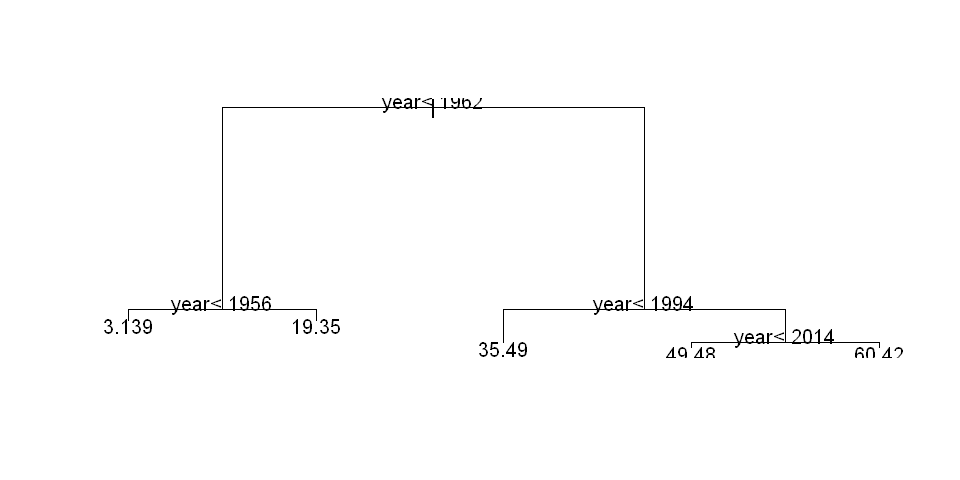

In [112]:
library(rpart) # chargement de la librairie
tree.reg=rpart(popularity~.,data=datappr,control=rpart.control(cp=0.01))
plot(tree.reg)
text(tree.reg)

In [113]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"popularity"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.80367217 0.24731873 0.05780275 0.02278248 0.01250812 
 3825788.7  1509177.0  1124682.7   992746.3   933245.3

In [114]:
install.packages("partykit")
library(partykit)
plot(as.party(tree.reg), type="simple")

Warning message in install.packages("partykit"):
"'lib = "C:/Program Files/R/R-4.0.4/library"' is not writable"


ERROR: Error in install.packages("partykit"): unable to install packages


### Estimation et élagage d'un arbre de discrimination

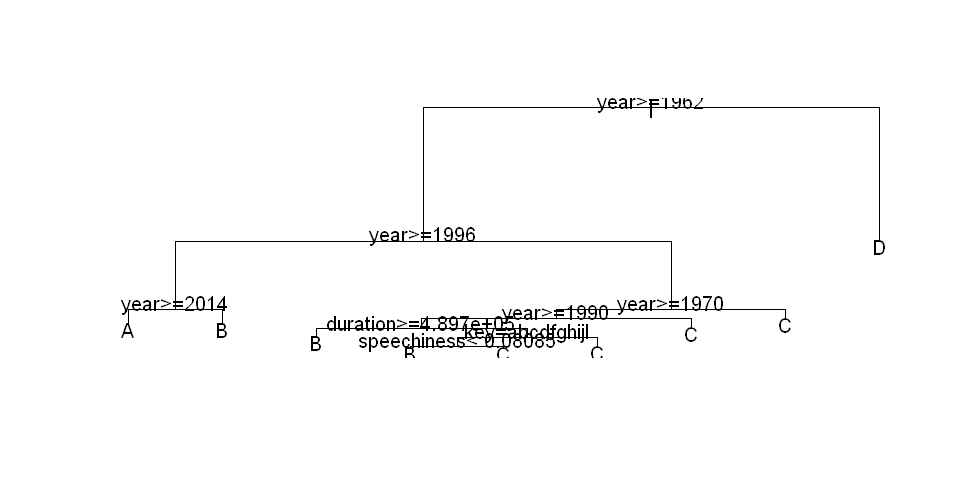

In [115]:
tree.dis=rpart(pop.class~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)  

In [116]:
rpart_1 <- rpart(pop.class~.,data=datappq,
                 method = "class", 
                 control = rpart.control(minsplit = 20, xval = 81, cp = 0.0005))
rpart_1$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.3768935937,0,1.0000000,1.0000000,0.007583868
2,0.1941960212,1,0.6231064,0.6231064,0.008074256
3,0.0439861289,2,0.4289104,0.4289104,0.007435529
4,0.0045628764,3,0.3849243,0.3849243,0.007192610
5,0.0029202409,5,0.3757985,0.3907647,0.007227262
6,0.0014601205,6,0.3728783,0.3854718,0.007195891
7,0.0012776054,7,0.3714181,0.3863844,0.007201344
8,0.0010950903,8,0.3701405,0.3891221,0.007217593
9,0.0009125753,9,0.3690454,0.3894871,0.007219746
10,0.0007300602,18,0.3595547,0.3909473,0.007228333


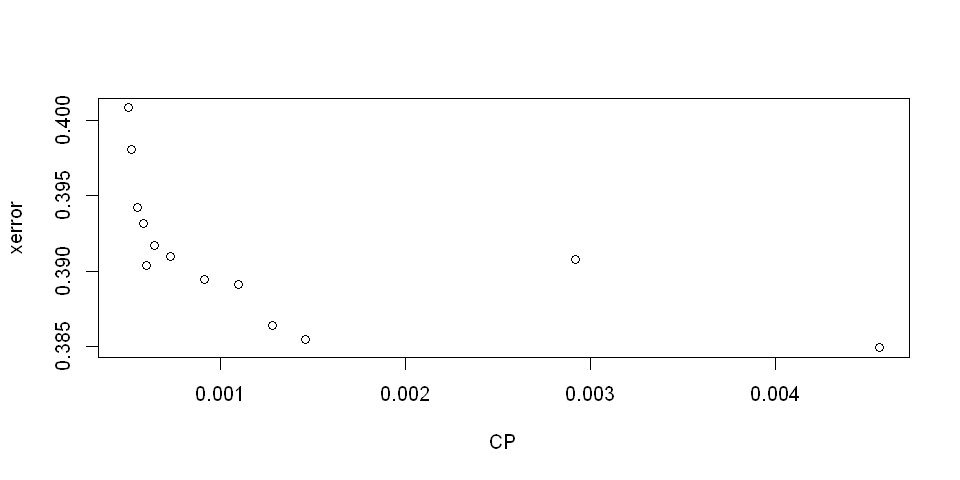

In [117]:
plot(rpart_1$cptable[4:16,c(1,4)])

In [119]:
tree.dis=rpart(pop.class~.,data=datappq,parms=list(split="information"),
               cp=0.001)

#### Erreur de régression



In [120]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"popularity"])^2)/nrow(datestr)
# dépassement de seuil (régression)
regression(pred.treer,datestr[,"popularity"])


[1] 126.3359

   c2
c1    A   B   C   D
  A 109  51   0  13
  B  75 307  60   4
  C  27 206 448  36
  D   2   8  60 594
0.729  est le pourcentage de réussite
0.271  l'erreur de prédiction
0.3055 est le coût

#### Erreur de classification (matrice de confusion)

In [121]:
# Même chose pour l'arbre de discrimination
table(pred.treeq,datestq[,"pop.class"])
N=2000
cat(sum(diag(table(pred.treeq,datestq[,"pop.class"]))/N)," est le pourcentage de réussite")

          
pred.treeq   A   B   C   D
         A  93  36   1  13
         B  71 335  83   4
         C  25 183 443  49
         D   2   7  59 596

0.7335  est le pourcentage de réussite

## [Agrégation de modèles]

### Forêts aléatoires

In [127]:
library(randomForest)
rf.reg=randomForest(popularity~., data=datappr,xtest=datestr[,-12],ytest=datestr[,"popularity"],
   ntree=500,do.trace=25,importance=TRUE)
rf.dis=randomForest(pop.class~.,data=datappq,xtest=datestq[,-14],ytest=datestq[,
   "pop.class"],ntree=500,do.trace=50,importance=TRUE)
predict.randomForest.c<-rf.dis$test$predicted
predict.randomForest.r<-rf.reg$test$predicted

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  25 |    114.1    23.87 |    114.5    23.44 |
  50 |    107.2    22.43 |    111.6    22.84 |
  75 |    105.4    22.05 |    111.4    22.80 |
 100 |    104.3    21.82 |    110.8    22.68 |
 125 |    104.3    21.81 |    110.9    22.69 |
 150 |    103.9    21.73 |    110.5    22.62 |
 175 |      104    21.74 |    110.4    22.59 |
 200 |    103.5    21.65 |    110.1    22.54 |
 225 |    103.4    21.63 |    110.4    22.60 |
 250 |    103.3    21.60 |    110.5    22.62 |
 275 |      103    21.55 |    110.2    22.55 |
 300 |      103    21.54 |    110.2    22.56 |
 325 |    102.7    21.48 |    110.4    22.59 |
 350 |    102.6    21.46 |    110.4    22.59 |
 375 |    102.6    21.46 |    110.4    22.59 |
 400 |    102.5    21.44 |    110.4    22.59 |
 425 |    102.4    21.43 |    110.3    22.57 |
 450 |    102.5    21.43 |    110.2    22.55 |
 475 |    102.5    21.43 |    110.1    22.54 |
 500 |    102

Discrimination

In [123]:
rf.dis=randomForest(pop.class~.,data=datappq,xtest=datestq[,-14],ytest=datestq[,
   "pop.class"],ntree=500,do.trace=50,importance=TRUE)

ntree      OOB      1      2      3      4|    Test      1      2      3      4
   50:  28.25% 61.92% 34.28% 30.48% 10.27%|  26.70% 62.30% 33.87% 27.47%  9.67%
  100:  27.77% 63.21% 34.28% 28.97%  9.80%|  26.40% 60.73% 34.22% 26.11% 10.12%
  150:  26.91% 62.44% 33.46% 27.37%  9.56%|  26.10% 60.73% 34.05% 25.26% 10.12%
  200:  26.75% 62.31% 33.81% 26.66%  9.44%|  26.25% 61.26% 34.22% 25.09% 10.42%
  250:  26.85% 62.56% 33.76% 26.95%  9.44%|  26.00% 61.78% 34.22% 24.40% 10.12%
  300:  26.76% 62.18% 33.76% 26.87%  9.36%|  25.95% 62.30% 33.69% 24.40% 10.27%
  350:  26.72% 61.79% 33.81% 26.74%  9.44%|  25.70% 60.73% 33.69% 24.23% 10.12%
  400:  26.60% 62.05% 33.81% 26.28%  9.40%|  26.10% 61.26% 34.22% 24.91% 10.12%
  450:  26.61% 61.92% 33.72% 26.62%  9.24%|  26.05% 61.78% 34.05% 24.74% 10.12%
  500:  26.72% 62.44% 34.11% 26.49%  9.20%|  26.10% 62.30% 34.22% 24.57% 10.12%


Classe décroissante moins à mieux prédites

In [124]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)
sort(round(importance(rf.dis), 2)[,4], decreasing=TRUE)

year instrumentalness         loudness      speechiness 
          157.38            34.59            30.73            29.82 
    danceability           energy          valence         duration 
           28.02            26.91            26.76            24.65 
    acousticness         liveness            tempo             mode 
           23.34            13.08            12.75             4.26 
             key 
            3.35

year      speechiness     acousticness     danceability 
          156.46            27.09            24.61            23.72 
        loudness           energy          valence         duration 
           17.87            15.31            14.34            14.20 
instrumentalness         liveness            tempo             mode 
           13.20             7.12             2.84             1.88 
             key 
           -0.33

In [ ]:
# la variable année est très important comme on l'a observé dans le CART

#### Erreur de régression

In [128]:
sum((predict.randomForest.r-datestr[,"popularity"])^2)/nrow(datestr)

[1] 110.19

#### Erreur de classification (matrice de confusion)

In [129]:
regression(predict.randomForest.r,datestr[,"popularity"])
double_classification(predict.randomForest.c,datestq[,"pop.class"])

   c2
c1    A   B   C   D
  A  55   5   0   4
  B 137 405 126   9
  C  21 157 400  78
  D   0   5  42 556
0.708  est le pourcentage de réussite
0.292  l'erreur de prédiction
0.3135 est le coût   c2
c1    A   B   C   D
  A  73  11   2   8
  B  92 373  89   6
  C  24 170 439  52
  D   2   7  56 596
0.7405  est le pourcentage de réussite
0.2595  erreur de prédiction 


### Réseau de neurones

In [130]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(popularity~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  126
initial  value 11677234.120677 
iter  10 value 3826036.957894
iter  20 value 3826022.451379
iter  30 value 3719102.241399
iter  40 value 3693100.816609
iter  50 value 3672420.351591
iter  60 value 3549988.444332
iter  70 value 3533158.085611
iter  80 value 3478485.368851
iter  90 value 3466314.109083
iter 100 value 2946527.662704
iter 110 value 2723756.192827
iter 120 value 2580880.836884
iter 130 value 2552605.653600
iter 140 value 2516238.951599
iter 150 value 2508283.478969
iter 160 value 2485695.774765
iter 170 value 2421009.254481
iter 180 value 2382257.055036
iter 190 value 2360650.198297
iter 200 value 2355915.684007
iter 210 value 2346263.227074
iter 220 value 2319905.921927
iter 230 value 2300306.667867
iter 240 value 2291831.676195
iter 250 value 2282286.904890
iter 260 value 2184023.618425
iter 270 value 2111048.280063
iter 280 value 2074011.448702
iter 290 value 2024051.956714
iter 300 value 1919187.934893
iter 310 value 1749746.816151
iter 320 value 1482305

a 23-5-1 network with 126 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.00   -0.31    0.02    0.29    0.05    0.00   -0.01   -0.01   -0.05   -0.82 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -0.86   -0.39   -0.71   -0.01    0.90   -2.40    0.34   -0.70    0.39   -0.13 
i20->h1 i21->h1 i22->h1 i23->h1 
   3.86    1.26    0.88   -0.57 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -4.82    8.83    0.00    5.67    4.47    0.00   -7.68   10.57   -0.03    0.35 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.47    3.46    7.91    8.00    1.34    5.42    8.54    1.49   -0.33   -0.54 
i20->h2 i21->h2 i22->h2 i23->h2 
   0.54    0.24   10.50   -0.03 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -3.68  -14.65    0.02   -4.70   -2.74    0.00    2.47  -13.

In [ ]:
library(e1071)
plot(tune.nnet(popularity~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(popularity~.,data=datappr,size=4:5,decay=1:10))

In [ ]:
nnet.reg=nnet(popularity~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"popularity"]
plot.res(fit.nnetr,res.nnetr,titre="")

### Cas de la discrimination

In [ ]:
# apprentissage
nnet.dis=nnet(pop.class~.,data=datappq,size=5,decay=0) 
summary(nnet.reg)

In [ ]:
plot(tune.nnet(pop.class~.,data=datappq,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE))

In [ ]:
nnet.dis=nnet(pop.class~.,data=datappq,size=5,decay=1) 

#### Erreur de régression

In [ ]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
sum((pred.nnetr-datestr[,"popularity"])^2)/nrow(datestr)
regression(pred.nnetr,datestr[,"popularity"])

#### Erreur de classification (matrice de confusion)


In [ ]:
double_classification(pred.nnetq,datestq[,"pop.class"])